**CARS DATA ANALYSIS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_6416\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Notes\CAR DETAILS FROM CAR DEKHO.csv" ,encoding = 'unicode_escape')

In [3]:
df.shape

(4340, 8)

In [4]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
#to check sum of null values
pd.isnull(df).sum() 

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [8]:
#Renaming column names
df.rename(columns = {'year':'model_year'},inplace = True)

In [9]:
df.rename(columns = {'selling_price':'selling_price(Rs)'},inplace = True)

In [10]:
df.head()

,name,model_year,selling_price(Rs),km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
#describe() returns description of the data in the DataFrame
df.describe()

,model_year,selling_price(Rs),km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [12]:
df[['km_driven']].describe()

,km_driven
count,4340.000000
mean,66215.777419
std,46644.102194
min,1.000000
25%,35000.000000
50%,60000.000000
75%,90000.000000
max,806599.000000


**Exploratory Data Analysis**

In [13]:
df.columns

Index(['name', 'model_year', 'selling_price(Rs)', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

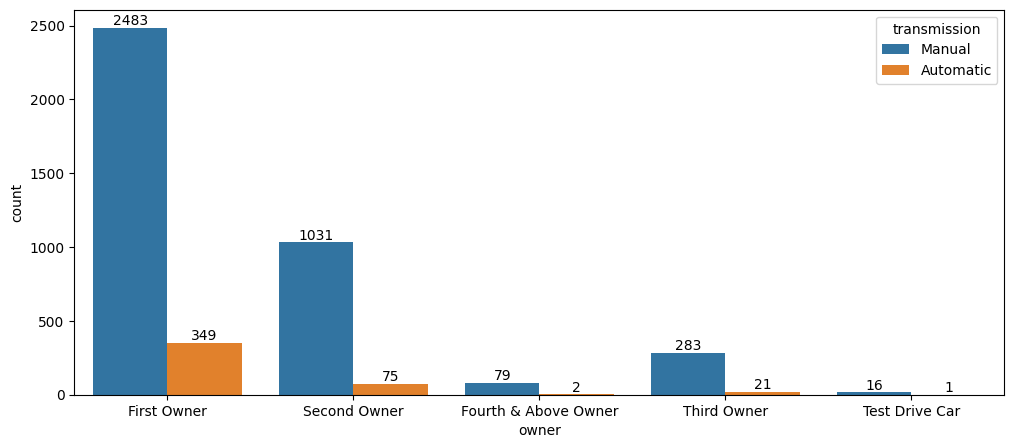

In [14]:
plt.figure(figsize=(12,5))
ay = sns.countplot(x = 'owner',data = df,hue= 'transmission')
#sns.set(rc={'figure.figsize':(15,5)})
for bars in ay.containers:
    ay.bar_label(bars)

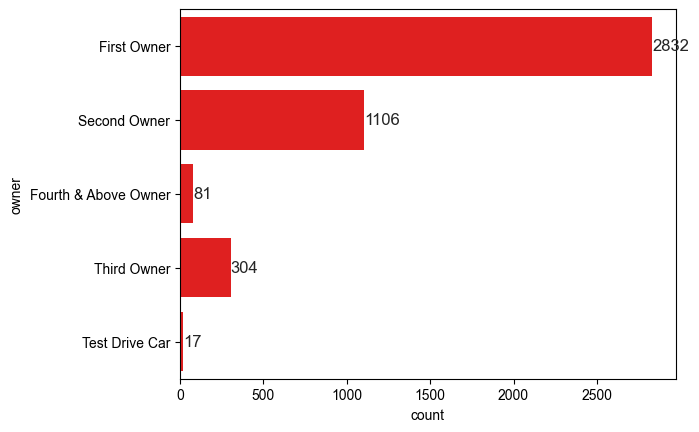

In [15]:
ax = sns.countplot(y = 'owner',data = df,color="r")
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
df.groupby(['owner'],as_index = False)['selling_price(Rs)'].sum()

,owner,selling_price(Rs)
0,First Owner,1695339898
1,Fourth & Above Owner,14085997
2,Second Owner,380343544
3,Test Drive Car,16222997
4,Third Owner,81920097


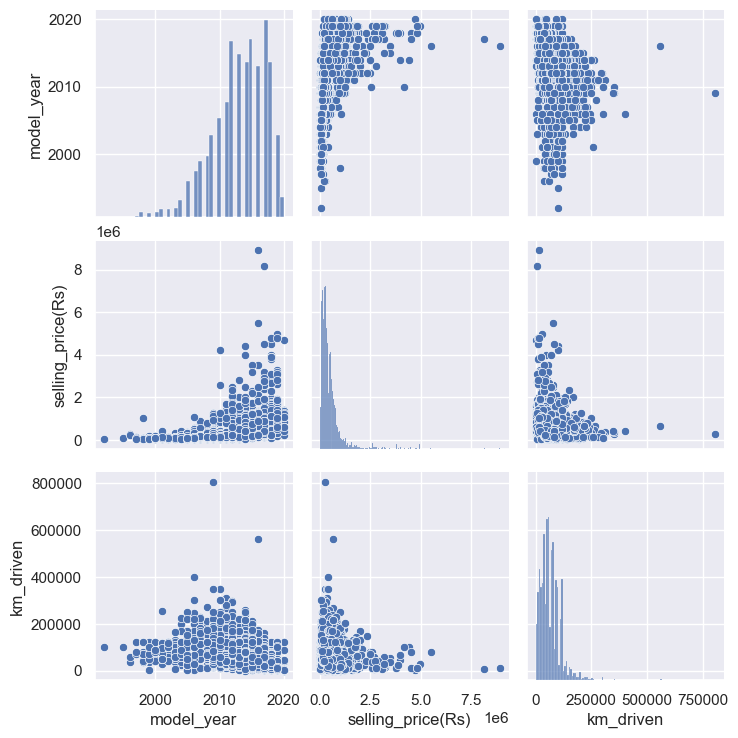

In [17]:
sns.pairplot(df)

In [18]:
df.groupby(['owner'],as_index = False)['selling_price(Rs)'].sum().sort_values(by = 'selling_price(Rs)',ascending = False)

,owner,selling_price(Rs)
0,First Owner,1695339898
2,Second Owner,380343544
4,Third Owner,81920097
3,Test Drive Car,16222997
1,Fourth & Above Owner,14085997


<Axes: xlabel='owner', ylabel='selling_price(Rs)'>

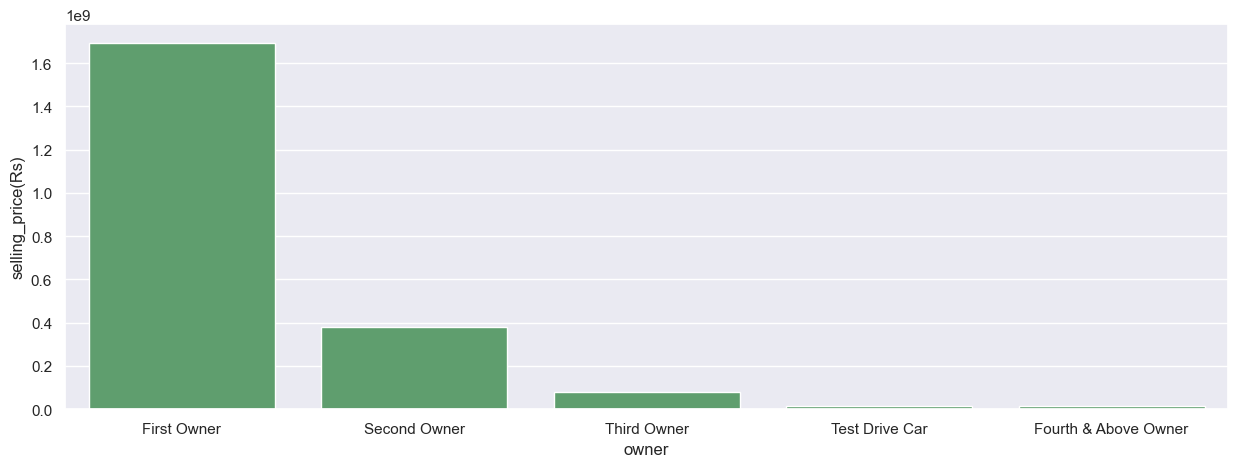

In [19]:
owner_vs_selling_price = df.groupby(['owner'],as_index = False)['selling_price(Rs)'].sum().sort_values(by = 'selling_price(Rs)',ascending = False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x ='owner',y ='selling_price(Rs)',data =owner_vs_selling_price,color ="g")


from the above graph we can say that first owner cars have more selling price

In [20]:
df.columns

Index(['name', 'model_year', 'selling_price(Rs)', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

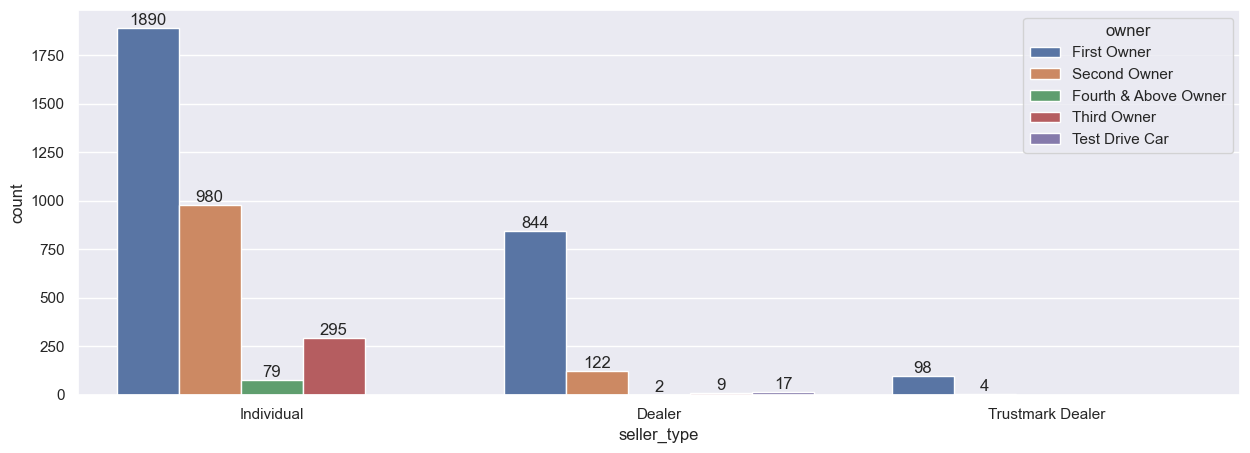

In [21]:
ay = sns.countplot(data = df, x ='seller_type', hue = 'owner')
for bars in ay.containers:
    ay.bar_label(bars)

<Axes: xlabel='selling_price(Rs)', ylabel='seller_type'>

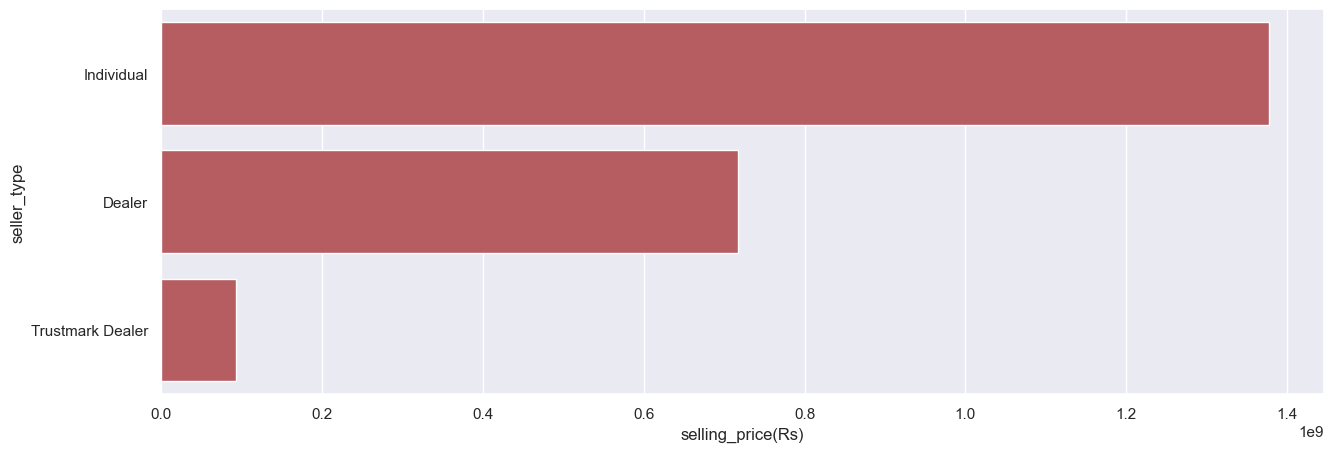

In [22]:
seller_type_vs_amnt = df.groupby(['seller_type'],as_index = False)['selling_price(Rs)'].sum().sort_values(by = 'selling_price(Rs)',ascending = False)
sns.barplot(y='seller_type',x ='selling_price(Rs)',data =seller_type_vs_amnt,color ="r")

from above graph we can see that individual seller type has more selling price amount

In [23]:
df.columns

Index(['name', 'model_year', 'selling_price(Rs)', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

<Axes: xlabel='fuel', ylabel='count'>

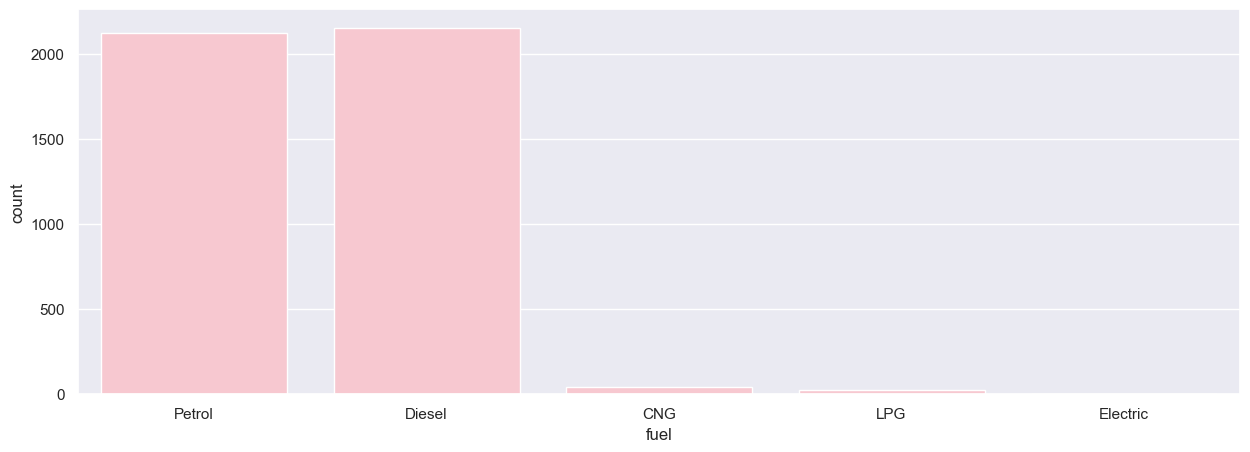

In [24]:
sns.countplot(x ='fuel', data = df,color="pink")


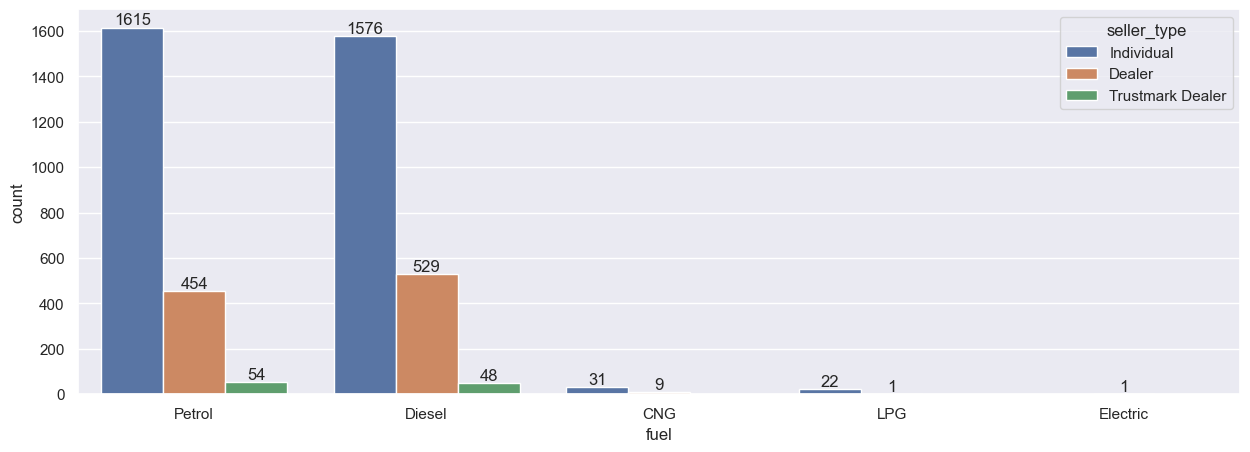

In [25]:
ay = sns.countplot(x ='fuel', data = df,hue = 'seller_type')
for bars in ay.containers:
    ay.bar_label(bars)

from above graph we can see that the count of petrol(individual) cars are more than others

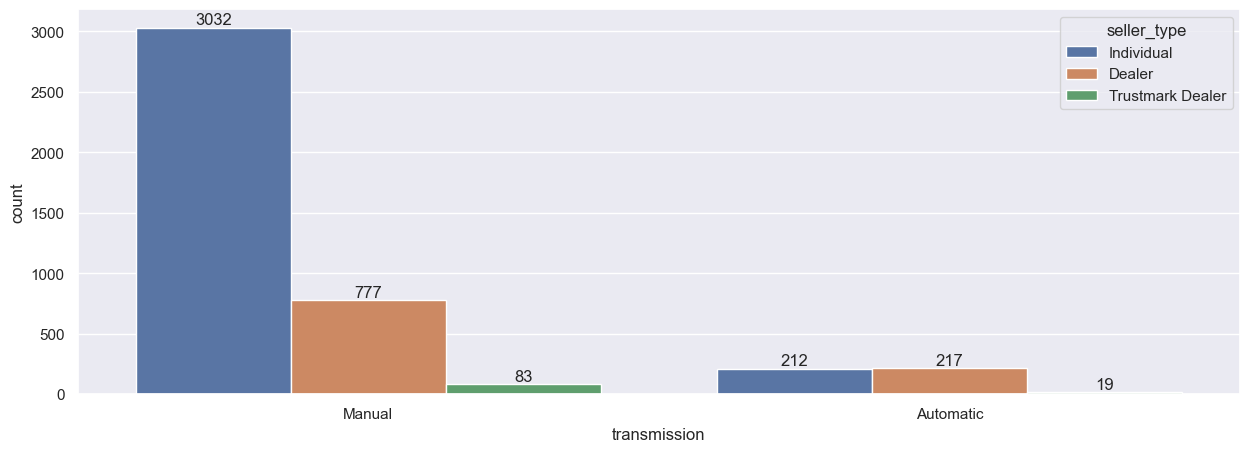

In [26]:
ay = sns.countplot(x ='transmission' , data = df , hue = 'seller_type')
for bars in ay.containers:
    ay.bar_label(bars)

from above graph we can see that there are more manual cars as compare to automatic

In [27]:
df.columns

Index(['name', 'model_year', 'selling_price(Rs)', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

<Axes: xlabel='model_year', ylabel='count'>

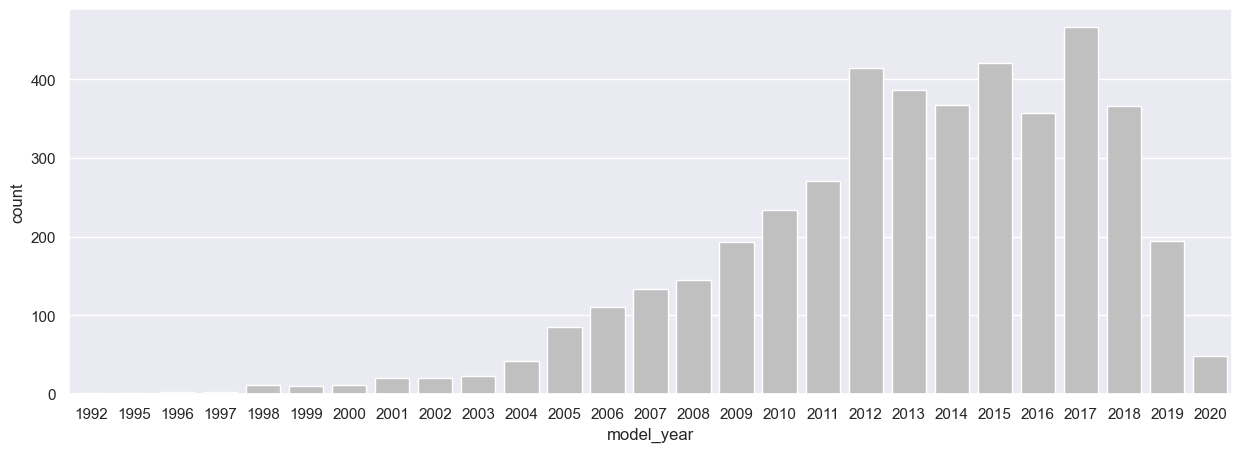

In [28]:
sns.countplot(x ='model_year' , data = df,color="silver")


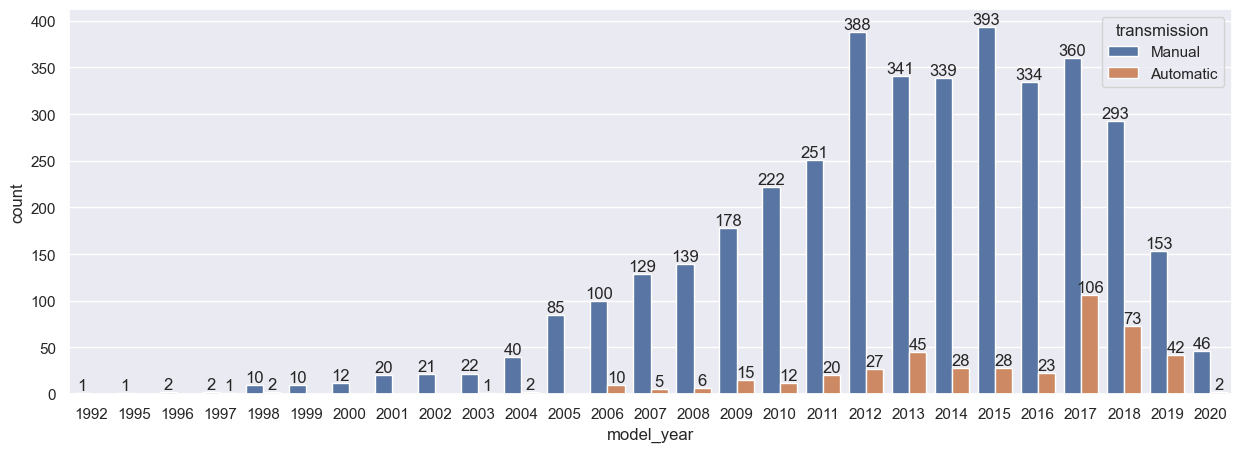

In [29]:
ay = sns.countplot(x ='model_year' , data = df,hue = 'transmission')
for bars in ay.containers:
    ay.bar_label(bars)

from above graph we can see model_year/transmission

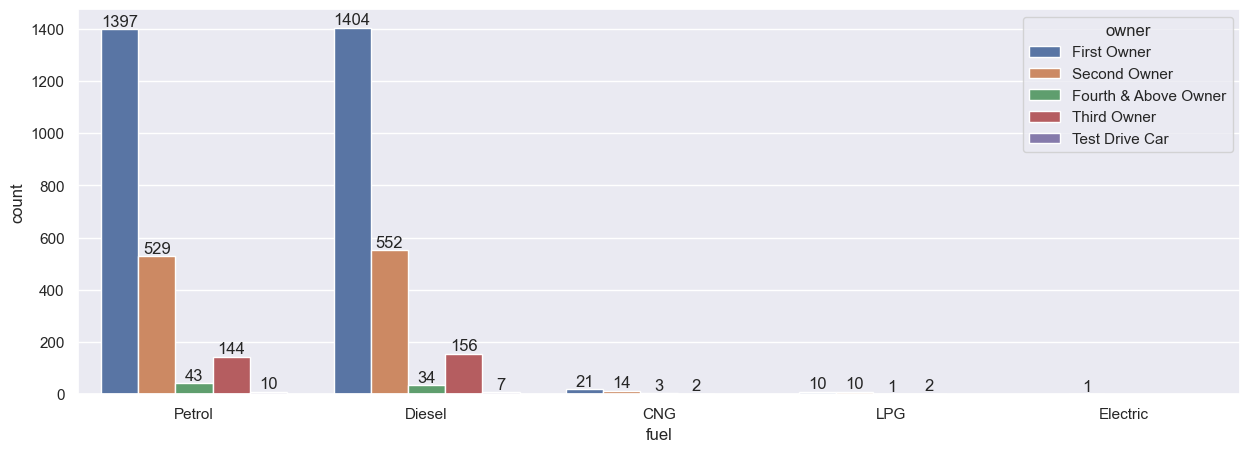

In [30]:
ay = sns.countplot(x='fuel' , data = df, hue = 'owner')
for bars in ay.containers:
    ay.bar_label(bars)

From above graph we can see that the count of first owner Diesel cars are more than other cars.

<Axes: xlabel='fuel', ylabel='selling_price(Rs)'>

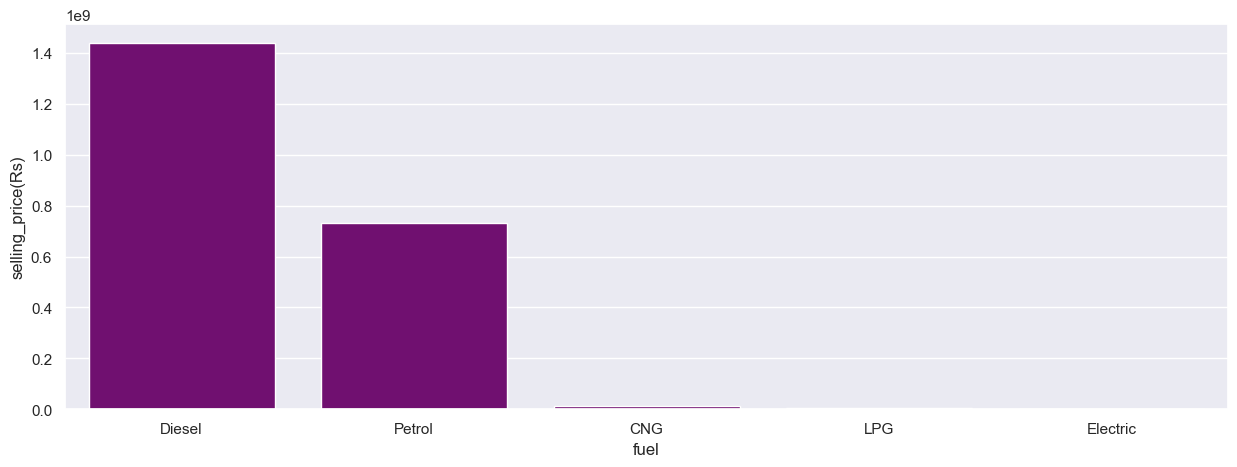

In [31]:
fuel_vs_selling_price = df.groupby(['fuel'],as_index = False)['selling_price(Rs)'].sum().sort_values(by = 'selling_price(Rs)',ascending = False)
sns.barplot(x ='fuel',y ='selling_price(Rs)',data =fuel_vs_selling_price,color = "purple")


from above graph we can see that Diesel cars have more selling price than other cars.